<a href="https://colab.research.google.com/github/ANGELJSS/PREDICCION-DE-MONTO-DE-PERDIDA-BANCO-/blob/main/Predicci%C3%B3n_del_monto_de_p%C3%A9rdida(Riesgo_operacional)_en_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción del monto de pérdida(Riesgo operacional) en Banco**

**Importamos librerias a utilizar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importamos la data**

**Data:**
> **data_banco.xlsx**
>
> - Esta data contiene 19,534 registros que mencionan su Linea de Negocio, Tipo de Evento, Monto de pérdida, Gerencia que reporta, Macroregión donde se materializa el evento, etc. 

**Contribuidor:**
> - Angel Jorge Salazar- angel.jorge@unmsm.edu.pe


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_banco =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Github/Predicción monto de pérdida/data_banco.xlsx',sheet_name='base', header =4)
data_banco.head()

,N°,Evento Estimado,Memo.,Código Evento,AÑO,Código Riesgo,Código Causa,Gerencia que reporta,Subgerencia que reporta,Macroregión donde se materializa el evento,Agencia donde se materializa el evento,Linea de Negocio,Tipo de Evento N1,Tipo de Evento N2,Descripción Corta,Descripción Larga,Código Reclamo,Apellidos y Nombres (Cliente Afectado),DNI,Código ATM,Marca de ATM,Ubicación del POS / ATM,N° Informe Técnico,N° Expediente,Petitorio,Fecha registro en Base de Datos,Fecha ocurrencia,Fecha descubrimiento,Monto Pérdida 1 (S/),Cuenta Contable - Pérdida 1,Fecha Reg. Contable - Pérdida 1,Sintético - Pérdida 1,Monto Multa/Sanción (S/),Cuenta Contable - Multa/Sanción,Fecha Reg. Contable - Multa/Sanción,Sintético - Multa/Sanción,Monto Intereses Legales (S/),Cuenta Contable - Intereses Legales,Fecha Reg. Contable - Intereses Legales,Sintético - Intereses Legales,Monto Gastos y Costos Indirectos (S/),Cuenta Contable - Gastos y Costos Indirectos,Fecha Reg. Contable - Gastos y Costos Indirectos,Sintético - Gastos y Costos Indirectos,Pérdida Bruta (S/.),Monto recuperado (Coberturas existentes) (S/),Cuenta Contable - recuperado (Coberturas existentes),Fecha Reg. Contable - recuperado (Coberturas existentes),Sintético - recuperado (Coberturas existentes),Monto recuperado (Otros conceptos) (S/.),Cuenta Contable - recuperado (Otros conceptos),Fecha Reg. Contable - recuperado (Otros conceptos),Sintético - recuperado (Otros conceptos)/td>,Total Monto recuperado (S/.),Pérdida Neta (S/.),Motivo de recuperación,Respuesta con Memorandum,Evento asociado a Riesgo Crediticio,Registro Contable,Estado,Observación,Código Evento Múltiple,Código Error ATM,N° Informe Legal,Clonación (Lugar de Ataque),POS involucrado
0,1,No,Memo 3122-0622-2011,2011-0001,2011,114,NaN,Gerencia de Operaciones,Subgerencia Banca Virtual,No identificado,No identificado,Otros servicios,Fraude externo,Robo y fraude,Copiado de información de banda magnética de T...,"Reclamo 005711-7, Cliente Espinoza Ortiz Gabin...",005711-7,ESPINOZA ORTIZ GABINO ALFREDO,29431392,0,NaN,NaN,NaN,0,NaN,2011-08-09,2011-03-28,2011-03-31,4453.96,6311.09.09.05.02,2011-09-29,146-28,0.0,NaN,NaT,NaN,0.0,NaN,NaT,NaN,0.0,NaN,NaT,NaN,4453.96,0.0,NaN,NaT,NaN,2000.0,NaN,NaN,NaN,2000.0,2453.96,Contracargos Ganados VISA,EF/92.2120 N° 291 - 2011,No,Conciliado,Cerrado,NaN,NaN,NaN,NaN,NaN,0
1,2,No,Memo 3122-0751-2011,2011-0002,2011,114,NaN,Gerencia de Operaciones,Subgerencia Banca Virtual,No identificado,No identificado,Otros servicios,Fraude externo,Robo y fraude,Copiado de información de banda magnética de T...,"Reclamo 283111-250, Cliente Nancy Pilar Pandur...",283111-250,PANDURO AREVALO NANCY PILAR,09857309,0,NaN,NaN,NaN,0,NaN,2011-08-09,2011-03-30,2011-04-01,2807.00,6311.09.09.05.02,2011-09-29,146-28,0.0,NaN,NaT,NaN,0.0,NaN,NaT,NaN,0.0,NaN,NaT,NaN,2807.00,0.0,NaN,NaT,NaN,280.2,NaN,NaN,NaN,280.2,2526.80,Contracargos Ganados VISA,EF/92.2120 N° 291 - 2011,No,Conciliado,Cerrado,NaN,NaN,NaN,NaN,NaN,0
2,3,No,Memo 3122-0622-2011,2011-0003,2011,114,NaN,Gerencia de Operaciones,Subgerencia Banca Virtual,No identificado,No identificado,Otros servicios,Fraude externo,Robo y fraude,Copiado de información de banda magnética de T...,"Reclamo 004511-13, Cliente Sipan Mendizabal Ví...",004511-13,SIPAN MENDIZABAL VICTOR LUIS,09542271,0,NaN,NaN,NaN,0,NaN,2011-08-09,2011-03-31,2011-04-04,4750.00,6311.09.09.05.02,2011-09-29,146-28,0.0,NaN,NaT,NaN,0.0,NaN,NaT,NaN,0.0,NaN,NaT,NaN,4750.00,0.0,NaN,NaT,NaN,2500.0,NaN,NaN,NaN,2500.0,2250.00,Contracargos Ganados VISA,EF/92.2120 N° 291 - 2011,No,Conciliado,Cerrado,NaN,NaN,NaN,NaN,NaN,0
3,4,No,Memo 3122-0622-2011,2011-0005,2011,114,NaN,Gerencia de Operaciones,Subgerencia Banca Virtual,No identificado,No identificado,Otros servicios,Fraude externo,Robo y fraude,Copiado de información de banda magnética de T...,"Reclamo 004611-45, Cliente Noemí Farfán Vidal,...",004611-45,FARFAN VIDAL NOEMI YENNY,08695633,0,NaN,NaN,NaN,0,NaN,2011-08-09,2011-04-01,2011-04-18,100.00,6311.09.09.05.02,2011-09-13,146-7,0.

In [5]:
data_banco.shape

(19534, 66)

In [6]:
data_banco.dtypes

N°                              int64
Evento Estimado                object
Memo.                          object
Código Evento                  object
AÑO                             int64
                                ...  
Código Evento Múltiple         object
Código Error ATM               object
N° Informe Legal               object
Clonación (Lugar de Ataque)    object
POS involucrado                object
Length: 66, dtype: object

In [7]:
data_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 66 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   N°                                                        19534 non-null  int64         
 1   Evento Estimado                                           19534 non-null  object        
 2   Memo.                                                     19158 non-null  object        
 3   Código Evento                                             19534 non-null  object        
 4   AÑO                                                       19534 non-null  int64         
 5   Código Riesgo                                             19534 non-null  int64         
 6   Código Causa                                              0 non-null      float64       
 7   Gerencia que reporta                    

In [8]:
data_banco['Código Causa'].unique()

array([nan])

In [10]:
#Eliminamos las columnas con pocos o datos incompletos
data_banco1 = data_banco.drop(['Código Causa','Clonación (Lugar de Ataque)','N° Informe Legal','Código Error ATM','Código Evento Múltiple','Observación','Respuesta con Memorandum','Motivo de recuperación','Sintético - recuperado (Otros conceptos)/td>','Fecha Reg. Contable - recuperado (Otros conceptos)','Cuenta Contable - recuperado (Otros conceptos)','Sintético - recuperado (Coberturas existentes)','Fecha Reg. Contable - recuperado (Coberturas existentes)','Cuenta Contable - recuperado (Coberturas existentes)','Sintético - Gastos y Costos Indirectos','Fecha Reg. Contable - Gastos y Costos Indirectos','Cuenta Contable - Gastos y Costos Indirectos','Sintético - Intereses Legales','Fecha Reg. Contable - Intereses Legales','Fecha Reg. Contable - Intereses Legales','Cuenta Contable - Intereses Legales','Sintético - Multa/Sanción','Fecha Reg. Contable - Multa/Sanción','Cuenta Contable - Multa/Sanción','Petitorio','Ubicación del POS / ATM','Marca de ATM'], axis=1)
data_banco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 40 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   N°                                             19534 non-null  int64         
 1   Evento Estimado                                19534 non-null  object        
 2   Memo.                                          19158 non-null  object        
 3   Código Evento                                  19534 non-null  object        
 4   AÑO                                            19534 non-null  int64         
 5   Código Riesgo                                  19534 non-null  int64         
 6   Gerencia que reporta                           19534 non-null  object        
 7   Subgerencia que reporta                        19449 non-null  object        
 8   Macroregión donde se materializa el evento     19534 non

In [13]:
data_banco1['Evento Estimado'].unique() # eliminar

array(['No'], dtype=object)

In [12]:
data_banco1['N°'].unique() # eliminar

array([    1,     2,     3, ..., 19532, 19533, 19534])

In [14]:
data_banco1['Memo.'].unique() # eliminar(ojo)

array(['Memo 3122-0622-2011', 'Memo 3122-0751-2011',
       'Memo 3122-0665-2011', ..., 'Memo 7220-0338-2020',
       'Memo 7220-0358-2020', 'Memo 2670-0010-2021'], dtype=object)

In [15]:
data_banco1['Código Evento'].unique() # eliminar(ojo)

array(['2011-0001', '2011-0002', '2011-0003', ..., '2020-2414',
       '2020-2415', '2020-2416'], dtype=object)

In [16]:
data_banco1['AÑO'].unique() 

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [17]:
data_banco1['Código Riesgo'].unique()

array([114, 120, 101, 113, 386, 359,  58,   0, 143,  16, 274, 105, 132,
       209, 301, 204, 158, 195, 128, 226, 123, 265, 225, 268, 270, 271,
       259, 236, 168, 148, 397, 124, 408, 387, 115, 341, 288, 140, 131,
       363, 444, 336, 395, 278, 366, 340, 275, 269, 144, 118, 338, 413,
        34, 435, 415, 436, 414, 281, 127, 401, 442, 438, 289, 441, 459,
       116, 190, 461, 248, 196, 388, 335, 463, 446, 471, 472, 507, 419])

In [18]:
data_banco1['Gerencia que reporta'].unique()

array(['Gerencia de Operaciones', 'Gerencia Banca de Servicio',
       'Gerencia Legal', 'Gerencia de Logística',
       'Gerencia de Finanzas y Contabilidad',
       'Gerencia Central de Negocios y Tecnología',
       'Gerencia de Seguridad y Prevención',
       'Gerencia Central de Administración', 'Gerencia de Riesgos',
       'Gerencia de Recursos Humanos',
       'Gerencia de Banca de Desarrollo e Inclusión Financiera'],
      dtype=object)

In [19]:
data_banco1['Subgerencia que reporta'].unique()

array(['Subgerencia Banca Virtual', 'Subgerencia Macro Región I - Piura',
       'Subgerencia Macro Región Lima', 'Subgerencia Asuntos Procesales',
       'Subgerencia Administración Y Servicios\xa0',
       'Subgerencia Macro Región V – Arequipa', 'Subgerencia Depósitos',
       'Subgerencia Macro Región IV - Cusco',
       'Subgerencia Macro Región II - Trujillo',
       'Subgerencia Macro Región III - Huancayo',
       'Subgerencia Contabilidad',
       'Subgerencia Servicios Bancarios y Recaudación',
       'Subgerencia Prevención Y Tratamiento Del Fraude\xa0',
       'Subgerencia Atención Centralizada De Reclamos',
       'Subgerencia Agentes Corresponsales Y Atm´S', nan,
       'Subgerencia Estudios Económicos Y Financieros',
       'Subgerencia Seguridad\xa0', 'Subgerencia Compensaciones',
       'Subgerencia Banca Personal', 'Subgerencia Canales Alternos',
       'Subgerencia Macro Región VI - Iquitos'], dtype=object)

In [20]:
data_banco1['Macroregión donde se materializa el evento'].unique()

array(['No identificado', 'Subgerencia Macro Región Lima',
       'Subgerencia Macro Región I - Piura',
       'Subgerencia Macro Región II - Trujillo',
       'Subgerencia Macro Región IV - Cusco',
       'Subgerencia Macro Región III - Huancayo',
       'Subgerencia Macro Región V – Arequipa'], dtype=object)

In [63]:
#data_banco1['Agencia donde se materializa el evento'].unique() #Ojo

In [22]:
data_banco1['Linea de Negocio'].unique()

array(['Otros servicios', 'Banca minorista', 'Liquidación y pagos',
       'Negociación y ventas', 'Banca comercial'], dtype=object)

In [23]:
data_banco1['Tipo de Evento N1'].unique()

array(['Fraude externo',
       'Interrupción del negocio y fallos en los sistemas',
       'Ejecución, entrega y gestión de procesos',
       'Daños a activos materiales',
       'Relaciones laborales y seguridad en el puesto de trabajo',
       'Clientes, productos y prácticas empresariales', 'Fraude interno'],
      dtype=object)

In [24]:
data_banco1['Tipo de Evento N2'].unique()

array(['Robo y fraude', 'Sistemas',
       'Seguimiento y presentación de informes',
       'Aceptación de clientes y documentación',
       'Recepción, ejecución y mantenimiento de operaciones',
       'Desastres y otros acontecimientos', 'Relaciones laborales',
       'Gestión de cuentas de clientes', 'Contrapartes comerciales',
       'Distribuidores y proveedores', 'Productos defectuosos',
       'Adecuación, divulgación de información y confianza'], dtype=object)

In [28]:
#data_banco1['Descripción Corta'].unique() # Eliminar por ahora

In [26]:
data_banco1['Descripción Larga'].unique() # Eliminar 

array(['Reclamo 005711-7, Cliente Espinoza Ortiz Gabino Alfredo, reclama el importe de S/ 4,453.96, pago según suscripción de Transacción Extrajudicial.',
       'Reclamo 283111-250, Cliente Nancy Pilar Panduro Arévalo, reclama el importe de S/ 2,807.00, pago según suscripción de Transacción Extrajudicial.',
       'Reclamo 004511-13, Cliente Sipan Mendizabal Víctor Luis, reclama el importe de S/ 4,750.00, pago según suscripción de Transacción Extrajudicial.',
       ..., 'RECLAMO 023120-647',
       'El representante Legal de la empresa Contratistas Irene SRL, señaló que con fecha 12.10.12, solicitó en la Agencia de San Marcos de la Provincia de Huaraz la actualización del registro de firmas de los representantes de la citada empresa ante el BN, informando que los movimientos bancarios serían ejercidos de manera conjunta por los representantes Sres. Wilfredo Yoni Vega Chávez y Alex Fredy Vega Albornoz. El 17.10.12 se tomó conocimiento que uno de los representantes retiró de manera ind

In [29]:
data_banco1['Código Reclamo'].unique() # Eliminar(ojo)

array(['005711-7', '283111-250', '004511-13', ..., '002720-25082',
       '054420-23', '051220-403'], dtype=object)

In [70]:
data_banco1.groupby('Código Reclamo')['Código Reclamo'].nunique()

Código Reclamo
0                      1
201827                 1
201880                 1
2018149                1
2018158                1
                      ..
355149-2139            1
615019-4               1
Indecopi               1
MIDIS 036-2014         1
MIDIS/P65-DEP-09-15    1
Name: Código Reclamo, Length: 9931, dtype: int64

In [31]:
data_banco1['Apellidos y Nombres (Cliente Afectado)'].unique() # Eliminar

array(['\xa0ESPINOZA ORTIZ GABINO ALFREDO',
       '\xa0PANDURO AREVALO NANCY PILAR',
       '\xa0SIPAN MENDIZABAL VICTOR LUIS', ...,
       '\xa0FLORES QQUESUHUALLPA WILFREDO',
       '\xa0VENTURA MENDOZA CARLOS ARMANDO',
       '\xa0MANRIQUE GUZMAN DE SIMBAÑA EMILIANA'], dtype=object)

In [32]:
data_banco1['DNI'].unique() # Eliminar

array(['\xa029431392', '\xa009857309', '\xa009542271', ...,
       '\xa023999904', '\xa023853407', '\xa021486141'], dtype=object)

In [33]:
data_banco1['Código ATM'].unique() # Eliminar(ojo)

array(['\xa00', '\xa0625', '\xa0703', ..., '\xa01858', '\xa01981',
       '\xa01789'], dtype=object)

In [71]:
data_banco1.groupby('Código ATM')['Código ATM'].nunique()

Código ATM
 0       1
 1       1
 110     1
 1101    1
 1102    1
        ..
 993     1
 995     1
 996     1
 998     1
 999     1
Name: Código ATM, Length: 1068, dtype: int64

In [34]:
data_banco1['N° Informe Técnico'].unique() # Eliminar(ojo)

array([nan, '\xa02070-0592-2015', '\xa02070-0091-2015', ...,
       '\xa02070-1420-2020', '\xa02070-1461-2020', '\xa02070-1465-2020'],
      dtype=object)

In [72]:
data_banco1.groupby('N° Informe Técnico')['N° Informe Técnico'].nunique()

N° Informe Técnico
 0                                    1
 001-2019                             1
 003-2017 / INDECOPI SAM              1
 2060-0001-2009                       1
 2060-0002-2019-JCRR                  1
                                     ..
 Resolución Final Nº 0600-2015/CC1    1
 Resolución INDECOPI                  1
 Resolución N°1405-2015 INDECOPI      1
 S/N                                  1
  2062-0057-2016                      1
Name: N° Informe Técnico, Length: 1081, dtype: int64

In [35]:
data_banco1['N° Expediente'].unique() # Eliminar(ojo)

array(['\xa00', nan, '\xa020659-2015', ...,
       '\xa0560-2018/PS0-INDECOPI-PIU', '\xa0642-2018/PS0-INDECOPI-PIU',
       '\xa01174-2017/ILN-PS0'], dtype=object)

In [73]:
data_banco1.groupby('N° Expediente')['N° Expediente'].nunique()

N° Expediente
 .                               1
 0                               1
 00007-2014-0-1616-JM-LA-01      1
 00009-2017                      1
 0001376-2010-0-1001-JR-LA-02    1
                                ..
  7850-2015-0-1801-JR-LA-12      1
  7971-2016-0-101-JR-LA-03       1
  9040-2014-0-1801-JR-LA-15      1
  9166-2014-25-1801-JR-LA-07     1
  9849-2013-0-1801-JR-LA-12      1
Name: N° Expediente, Length: 2591, dtype: int64

In [37]:
#data_banco1['Fecha registro en Base de Datos'].unique() # Eliminar(ojo), podemos usara para series temporales

In [39]:
data_banco1['Fecha ocurrencia'].unique() # Eliminar(ojo)

array(['2011-03-28T00:00:00.000000000', '2011-03-30T00:00:00.000000000',
       '2011-03-31T00:00:00.000000000', ...,
       '2020-06-23T00:00:00.000000000', '2020-06-03T00:00:00.000000000',
       '2020-05-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [40]:
data_banco1['Fecha descubrimiento'].unique() # Eliminar(ojo)

array(['2011-03-31T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-04-04T00:00:00.000000000', ...,
       '2020-06-09T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-05-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [41]:
data_banco1['Monto Pérdida 1 (S/)'].unique() 

array([4453.96, 2807.  , 4750.  , ...,  479.08, 6228.64, 1107.  ])

In [43]:
#data_banco1['Cuenta Contable - Pérdida 1'].unique() # Eliminar

In [44]:
data_banco1['Fecha Reg. Contable - Pérdida 1'].unique() # Eliminar

array(['2011-09-29T00:00:00.000000000', '2011-09-13T00:00:00.000000000',
       '2011-09-14T00:00:00.000000000', ...,
       '2020-12-21T00:00:00.000000000', '2020-11-13T00:00:00.000000000',
       '2020-12-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [45]:
data_banco1['Sintético - Pérdida 1'].unique() # Eliminar

array(['\xa0146-28', '\xa0146-7', '\xa0146-4', ..., '\xa0806-6510',
       '\xa0893-904', '\xa0813-8845'], dtype=object)

In [47]:
#data_banco1['Monto Multa/Sanción (S/)'].unique() 

In [48]:
data_banco1['Monto Intereses Legales (S/)'].unique()

array([0.000000e+00, 3.912363e+04, 2.326400e+03, ..., 1.200000e+01,
       8.160000e+01, 8.550000e+00])

In [50]:
#data_banco1['Monto Gastos y Costos Indirectos (S/)'].unique()

In [51]:
data_banco1['Pérdida Bruta (S/.)'].unique()

array([ 4453.96,  2807.  ,  4750.  , ...,   441.09,  1307.61, 40036.  ])

In [53]:
#data_banco1['Monto recuperado (Coberturas existentes) (S/)'].unique() #eliminar

In [54]:
data_banco1['Monto recuperado (Otros conceptos) (S/.)'].unique() #eliminar

array([2000.  ,  280.2 , 2500.  , ...,  398.  ,  211.14,  323.2 ])

In [55]:
data_banco1['Total Monto recuperado (S/.)'].unique()

array([ 2000.  ,   280.2 ,  2500.  , ...,   211.14,   323.2 , 17622.  ])

In [56]:
data_banco1['Pérdida Neta (S/.)'].unique()

array([ 2453.96,  2526.8 ,  2250.  , ...,   441.09,  1307.61, 40036.  ])

In [57]:
data_banco1['Evento asociado a Riesgo Crediticio'].unique()

array(['\xa0No', '\xa0Si'], dtype=object)

In [58]:
data_banco1['Registro Contable'].unique()

array(['\xa0Conciliado', nan, '\xa0No conciliado'], dtype=object)

In [59]:
data_banco1['Estado'].unique()

array(['\xa0Cerrado', '\xa0Abierto', '\xa0Observados', nan], dtype=object)

In [60]:
data_banco1['POS involucrado'].unique() #eliminar

array(['\xa00'], dtype=object)

In [61]:
data_banco1 = data_banco1.drop(['POS involucrado','Monto recuperado (Otros conceptos) (S/.)','Monto recuperado (Coberturas existentes) (S/)','Sintético - Pérdida 1','Fecha Reg. Contable - Pérdida 1','Cuenta Contable - Pérdida 1','Fecha descubrimiento','Fecha ocurrencia','Fecha registro en Base de Datos','DNI','Apellidos y Nombres (Cliente Afectado)','Descripción Larga','Descripción Corta','Memo.','N°','Evento Estimado'], axis=1)
data_banco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Código Evento                               19534 non-null  object 
 1   AÑO                                         19534 non-null  int64  
 2   Código Riesgo                               19534 non-null  int64  
 3   Gerencia que reporta                        19534 non-null  object 
 4   Subgerencia que reporta                     19449 non-null  object 
 5   Macroregión donde se materializa el evento  19534 non-null  object 
 6   Agencia donde se materializa el evento      19534 non-null  object 
 7   Linea de Negocio                            19534 non-null  object 
 8   Tipo de Evento N1                           19534 non-null  object 
 9   Tipo de Evento N2                           19534 non-null  object 
 10  Código Rec

In [74]:
data_banco1 = data_banco1.drop(['Código Evento','Código Reclamo','N° Informe Técnico','N° Expediente'], axis=1)
data_banco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   AÑO                                         19534 non-null  int64  
 1   Código Riesgo                               19534 non-null  int64  
 2   Gerencia que reporta                        19534 non-null  object 
 3   Subgerencia que reporta                     19449 non-null  object 
 4   Macroregión donde se materializa el evento  19534 non-null  object 
 5   Agencia donde se materializa el evento      19534 non-null  object 
 6   Linea de Negocio                            19534 non-null  object 
 7   Tipo de Evento N1                           19534 non-null  object 
 8   Tipo de Evento N2                           19534 non-null  object 
 9   Código ATM                                  19534 non-null  object 
 10  Monto Pérd

In [75]:
#eliminamos valores NaN
data_banco1 =data_banco1.dropna()
data_banco1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13843 entries, 0 to 19533
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   AÑO                                         13843 non-null  int64  
 1   Código Riesgo                               13843 non-null  int64  
 2   Gerencia que reporta                        13843 non-null  object 
 3   Subgerencia que reporta                     13843 non-null  object 
 4   Macroregión donde se materializa el evento  13843 non-null  object 
 5   Agencia donde se materializa el evento      13843 non-null  object 
 6   Linea de Negocio                            13843 non-null  object 
 7   Tipo de Evento N1                           13843 non-null  object 
 8   Tipo de Evento N2                           13843 non-null  object 
 9   Código ATM                                  13843 non-null  object 
 10  Monto Pérd

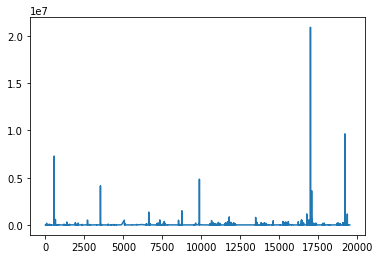

In [76]:
plt.plot(data_banco1.index,data_banco1['Monto Pérdida 1 (S/)'])
plt.show()

In [78]:
data_banco1.describe()

,AÑO,Código Riesgo,Monto Pérdida 1 (S/),Monto Multa/Sanción (S/),Monto Intereses Legales (S/),Monto Gastos y Costos Indirectos (S/),Pérdida Bruta (S/.),Total Monto recuperado (S/.),Pérdida Neta (S/.)
count,13843.000000,13843.000000,1.384300e+04,13843.000000,1.384300e+04,13843.000000,1.384300e+04,1.384300e+04,1.384300e+04
mean,2017.567796,270.662501,1.157896e+04,174.196413,1.673384e+03,277.720842,1.370427e+04,1.194798e+03,1.250947e+04
std,2.326622,93.899410,2.240332e+05,5134.601888,3.316405e+04,3809.267243,2.268740e+05,7.267088e+04,2.148523e+05
min,2011.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e-02,0.000000e+00,-2.115825e+05
25%,2015.000000,226.000000,6.607000e+01,0.000000,0.000000e+00,0.000000,1.299750e+02,0.000000e+00,8.060500e+01
50%,2019.000000,274.000000,2.499100e+02,0.000000,0.000000e+00,0.000000,4.000000e+02,0.000000e+00,4.000000e+02
75%,2019.000000,338.000000,1.200000e+03,0.000000,0.000000e+00,0.000000,3.320100e+03,0.000000e+00,2.874200e+03
max,2020.000000,507.000000,2.093198e+07,412737.540000,3.750281e+06,371389.850000,2.093198e+07,7.291430e+06,2.093198e+07
